In [7]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import math

In [8]:
N=100
state = 2*np.random.randint(2, size=(1,N))-1 # randomized
#state = 2*np.random.randint(1, size=(1,N))-1 # all down
#print(calcMag(state))
print(state)

[[ 1 -1  1  1  1 -1  1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1
  -1 -1 -1  1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
   1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1 -1
  -1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1  1
   1 -1 -1  1]]


In [11]:
#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------

def initialstate(N):
    ''' generates a random spin configuration for initial condition'''
    # NxN matrix with random inters -1,1
    #state = 2*np.random.randint(2, size=(1,N))-1 # randomized
    #state = 2*np.random.randint(1, size=(1,N))+1 # all up
    state = 2*np.random.randint(1, size=(1,N))-1 # all down
    return state

def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''

    #Config is the NxN spin matrix configuration
    #In each iteration NxN updates

    for i in range(N):
        b = np.random.randint(0, N) # what spin we try to flip (a random spin)
        s =  config[0,b] # initial spin of the spin we will try to flip
        nb = config[0,(b+1)%N] + config[0,(b-1)%N] # flip the spin (wrap around right and left)
        #print nb
        cost = 2*s*nb
        if cost < 0:
            s *= -1 # flip the spin
        elif rand() < np.exp(-cost*beta): # beta is = 1/kT
            s *= -1 # flip the spin
        #otherwise we don't flip the spin
        config[0,b] = s # new state (with s either flipped or not)
    #print config
    return config

def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(N):
        S = config[0,i]
        nb = config[0,(i+1)%N] + config[0,(i-1)%N]
        #print nb
        energy += -nb*S
    return energy/2.    #Divide by 2 ensures , avoid multiple counting

def calcMag(config):
    '''Magnetization of a given configuration'''
    #magnetiation is just sum of all spins \sum_{i} S_i
    mag = np.sum(np.sum(config))
    return mag

In [12]:
## change the parameter below if you want to simulate a smaller system
nt      = 2**4        # number of temperature points
N       = 2**6        # size of the lattice, N
eqSteps = 2**10       # number of MC steps for equilibration
mcSteps = 2**10       # number of MC sweeps for calculation

n1, n2  = 1.0/(mcSteps*N*1), 1.0/(mcSteps*mcSteps*N*1)

T=np.linspace(.2, 1.0, nt) # starting, ending, num t steps

Energy       = np.zeros(nt);   Magnetization  = np.zeros(nt)
SpecificHeat = np.zeros(nt);   Susceptibility = np.zeros(nt)


#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
print("Starting!!")
#m is the temperature index

for m in range(len(T)):
    print("On temp",m,"of length",len(T))

    config = initialstate(N)
    iT=1.0/T[m]; iT2=iT*iT; # beta = 1/(k_B*T)

    for l in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves
        if l%50==0: print("in mcmove",l)

    #Calculate quantities post equilibriation
    E1 = M1 = E2 = M2 = 0
    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation
        if i%50==0: print("in mcstep",i,"e=",Ene)

        E1 = E1 + Ene                 #Cumulative energy
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag
        E2 = E2 + Ene*Ene

        Energy[m]         = n1*E1     #Weighing for MC averages
        Magnetization[m]  = n1*M1
        SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
        Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT2

Starting!!
On temp 0 of length 16
in mcmove 0
in mcmove 50
in mcmove 100
in mcmove 150
in mcmove 200
in mcmove 250
in mcmove 300
in mcmove 350
in mcmove 400
in mcmove 450
in mcmove 500
in mcmove 550
in mcmove 600
in mcmove 650
in mcmove 700
in mcmove 750
in mcmove 800
in mcmove 850
in mcmove 900
in mcmove 950
in mcmove 1000
in mcstep 0 e= -64.0
in mcstep 50 e= -64.0
in mcstep 100 e= -64.0
in mcstep 150 e= -64.0
in mcstep 200 e= -64.0
in mcstep 250 e= -64.0
in mcstep 300 e= -64.0
in mcstep 350 e= -64.0
in mcstep 400 e= -64.0
in mcstep 450 e= -64.0
in mcstep 500 e= -64.0
in mcstep 550 e= -64.0
in mcstep 600 e= -64.0
in mcstep 650 e= -64.0
in mcstep 700 e= -64.0
in mcstep 750 e= -64.0
in mcstep 800 e= -64.0
in mcstep 850 e= -64.0
in mcstep 900 e= -64.0
in mcstep 950 e= -64.0
in mcstep 1000 e= -64.0
On temp 1 of length 16
in mcmove 0
in mcmove 50
in mcmove 100
in mcmove 150
in mcmove 200
in mcmove 250
in mcmove 300
in mcmove 350
in mcmove 400
in mcmove 450
in mcmove 500
in mcmove 550
in mc

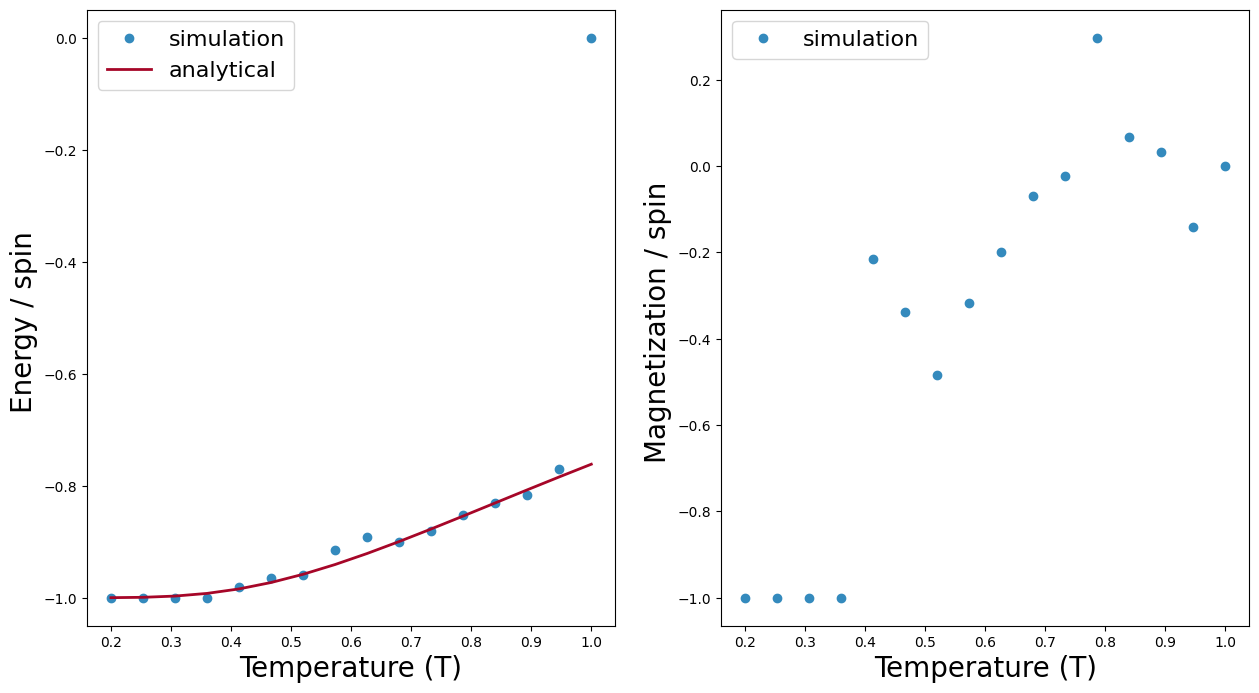

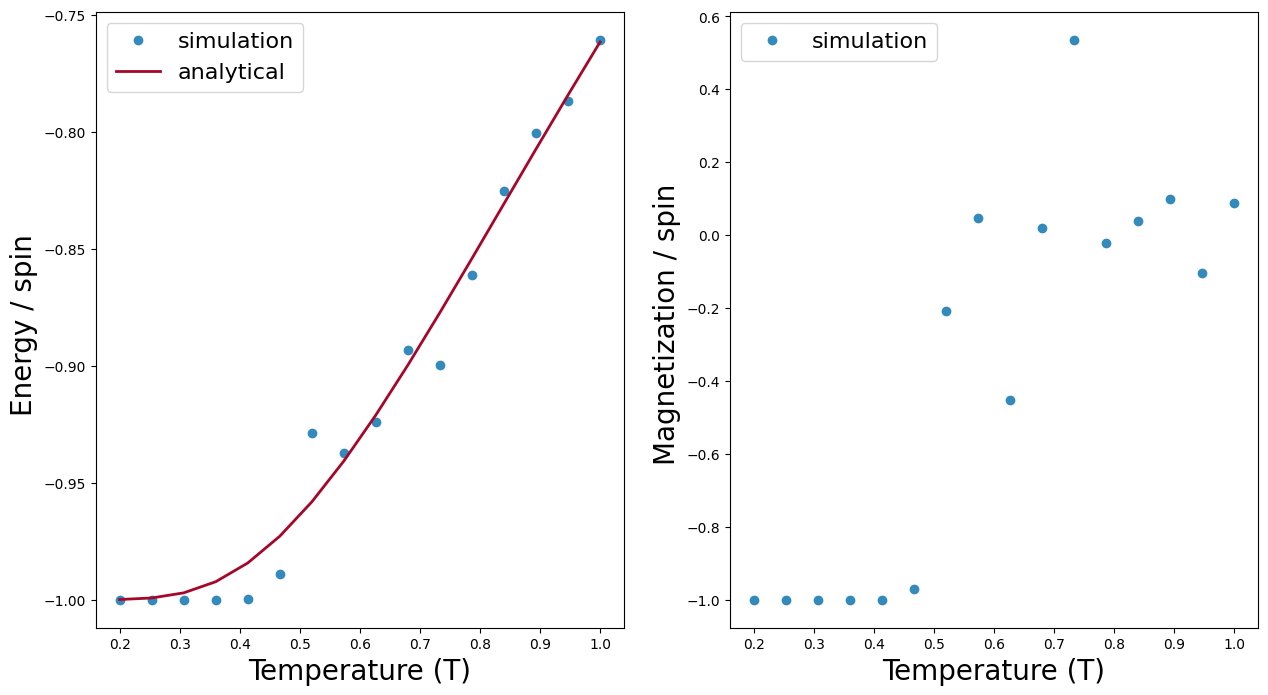

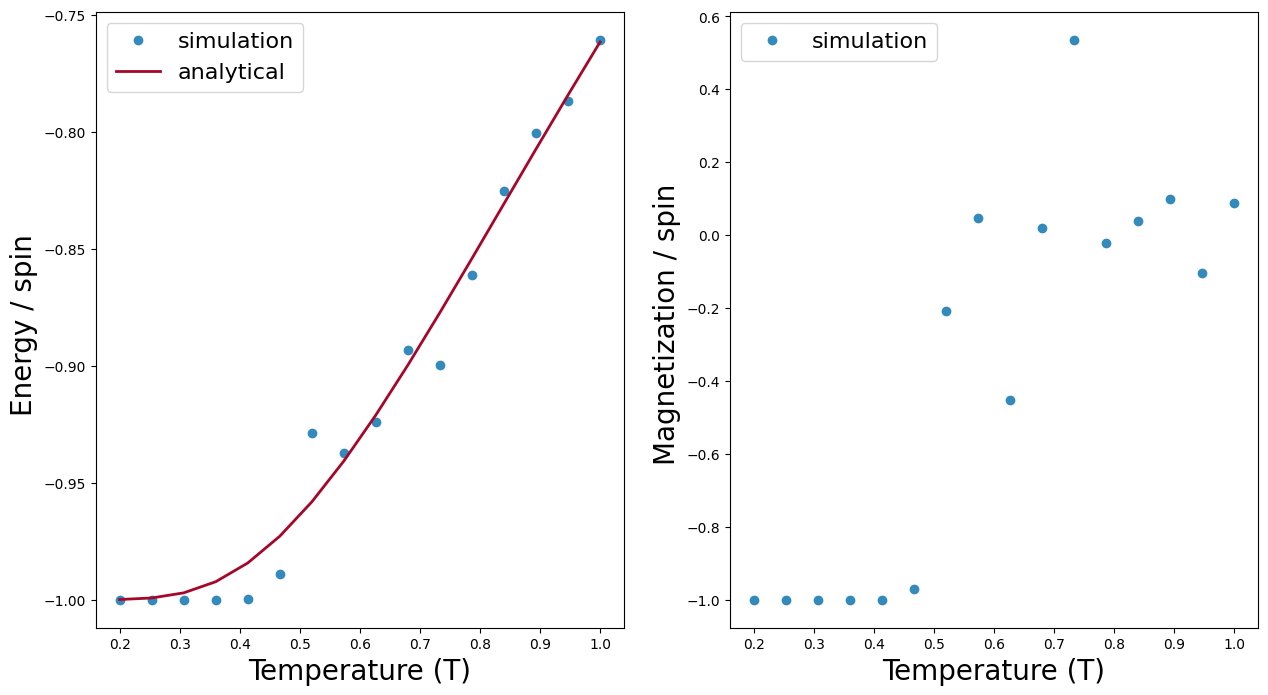

In [14]:
f = plt.figure(figsize=(15, 8)); # plot the calculated values

sp =  f.add_subplot(1, 2, 1 );
plt.plot(T, Energy, 'o', color="#348ABD", label='simulation');
plt.plot(T, -np.tanh(1.0/T), color="#A60628", lw=2,label='analytical')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy / spin ", fontsize=20); plt.legend(fontsize=16)


sp =  f.add_subplot(1, 2, 2 );
plt.plot(T, Magnetization, 'o', color="#348ABD", label='simulation');
#plt.plot(T, (crazy func from book), color="#A60628", lw=2,label='analytical')
plt.xlabel("Temperature (T)", fontsize=20); #plt.ylim([-10, -2])
plt.ylabel("Magnetization / spin ", fontsize=20);  plt.legend(fontsize=16)
plt.show()